In [1]:
import pandas as pd

In [2]:
# 函数默认提供的数据中有标题栏
train_data = pd.read_csv("breast-cancer-train.csv",)

# 显示前 10 行数据
train_data[:10]

,Unnamed: 0,Clump Thickness,Cell Size,Type
0,163,1,1,0
1,286,10,10,1
2,612,10,10,1
3,517,1,1,0
4,464,1,1,0
5,277,1,1,0
6,408,3,2,0
7,104,10,10,1
8,114,3,2,0
9,627,1,1,0


In [3]:
# 显示最后 10 行数据
train_data[-10:]

,Unnamed: 0,Clump Thickness,Cell Size,Type
514,214,10,10,1
515,466,6,6,1
516,121,2,1,0
517,614,1,1,0
518,20,3,2,1
519,71,10,2,1
520,106,10,10,1
521,270,4,7,1
522,435,8,10,1
523,102,1,2,0


In [4]:
train_data.shape

(524, 4)

In [5]:
test_data = pd.read_csv("breast-cancer-test.csv")
test_data.shape

(175, 4)

In [6]:
# 将测试数据集中的正样本挑选出来
test_data_positive = test_data.loc[ test_data['Type'] == 1 ][ ['Clump Thickness', 'Cell Size'] ]
test_data_positive[:5]

,Clump Thickness,Cell Size
3,5,5
7,6,6
8,4,10
9,3,3
11,10,3


In [7]:
# 将测试数据集中的负样本挑选出来
test_data_negative = test_data.loc[ test_data['Type'] == 0 ][ ['Clump Thickness', 'Cell Size'] ]
test_data_negative[:5]

,Clump Thickness,Cell Size
0,1,2
1,1,1
2,1,1
4,1,1
5,1,1


In [8]:
import matplotlib.pyplot as plt

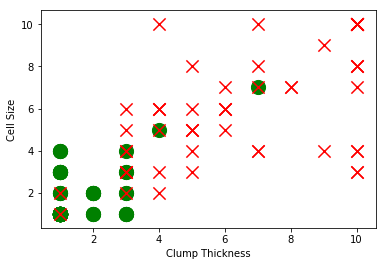

In [9]:
# 正样本红色 X 标注
# 负样本绿色 O 标注
plt.scatter(test_data_negative['Clump Thickness'], test_data_negative['Cell Size'], marker='o', s=200, c='green')
plt.scatter(test_data_positive['Clump Thickness'], test_data_positive['Cell Size'], marker='x', s=150, c='red')
plt.xlabel('Clump Thickness')
plt.ylabel('Cell Size')
plt.show()

In [10]:
import numpy as np

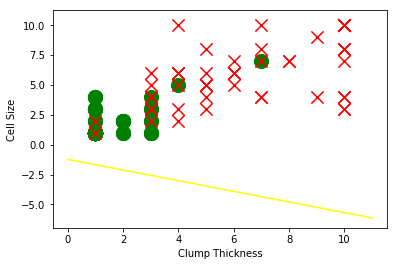

In [11]:
# 生成截距
intercept = np.random.random([1])
# 生成系数
coef = np.random.random([2])

# 为什么是两个系数，因为有两个特征吗！！！
# 'Clump Thickness', 'Cell Size'
# coef[0]*lx + coef[1]*ly + intercept = 0
# lx -> 'Clump Thickness', ly -> 'Cell Size'
lx = np.arange(0, 12)
ly = (-intercept - coef[0] * lx) / coef[1]
plt.plot(lx, ly, c='yellow')

plt.scatter(test_data_negative['Clump Thickness'], test_data_negative['Cell Size'], marker='o', s=200, c='green')
plt.scatter(test_data_positive['Clump Thickness'], test_data_positive['Cell Size'], marker='x', s=150, c='red')
plt.xlabel('Clump Thickness')
plt.ylabel('Cell Size')
plt.show()

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
lr = LogisticRegression()

In [14]:
lr.fit(train_data[['Clump Thickness', 'Cell Size']][:10], train_data['Type'][:10])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
print 'Testing Accuracy (10 training samples):', lr.score(test_data[['Clump Thickness', 'Cell Size']], test_data['Type'])

Testing Accuracy (10 training samples): 0.868571428571


In [16]:
print lr.intercept_
print lr.coef_
print lr.coef_[0, :]

[-1.51522787]
[[-0.10721332  0.48314152]]
[-0.10721332  0.48314152]


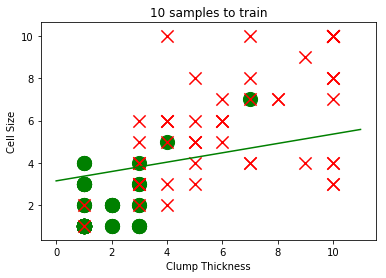

In [17]:
intercept = lr.intercept_
coef = lr.coef_[0, :]

lx = np.arange(0, 12)
ly = (-intercept - lx * coef[0]) / coef[1]

plt.plot(lx, ly, c='green')

plt.scatter(test_data_negative['Clump Thickness'], test_data_negative['Cell Size'], marker='o', s=200, c='green')
plt.scatter(test_data_positive['Clump Thickness'], test_data_positive['Cell Size'], marker='x', s=150, c='red')
plt.xlabel('Clump Thickness')
plt.ylabel('Cell Size')
plt.title('10 samples to train')
plt.show()

In [18]:
lr.fit(train_data[['Clump Thickness', 'Cell Size']], train_data['Type'])
print 'Testing accuracy (all training samples):', lr.score(test_data[['Clump Thickness', 'Cell Size']], test_data['Type'])

Testing accuracy (all training samples): 0.937142857143


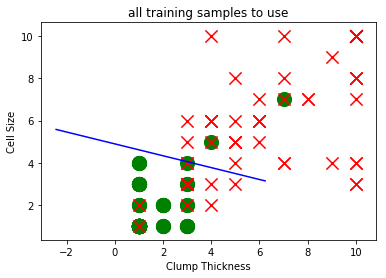

In [19]:
intercept = lr.intercept_
coef = lr.coef_[0, :]

lx = np.arange(0, 12)
lx = (-intercept - lx * coef[0]) / coef[1]

plt.plot(lx, ly, c='blue')

plt.scatter(test_data_negative['Clump Thickness'], test_data_negative['Cell Size'], marker='o', c='green', s=200)
plt.scatter(test_data_positive['Clump Thickness'], test_data_positive['Cell Size'], marker='x', c='red', s=150)
plt.xlabel('Clump Thickness')
plt.ylabel('Cell Size')
plt.title('all training samples to use')
plt.show()